In [2]:
import pandas as pd

df = pd.read_csv('mpg.csv')
df

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [3]:
#전체차량의 cty와 hwy의 통합 연비평균은 어떻게 될까?
df['total'] = (df['cty']+df['hwy'])/2
df

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,total
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [7]:
sum(df['total']/len(df))

20.14957264957265

In [42]:
#cty와 hwy의 통합 연비평균이 20가 넘어가는 차량은 몇개일까?
import numpy as np

df['test']=np.where(df['total'] >20,'20이상','20이하')
df['test'].value_counts()

20이상    123
20이하    111
Name: test, dtype: int64

<AxesSubplot:>

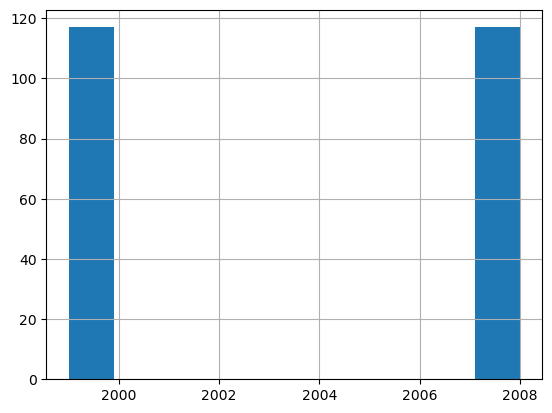

In [16]:
#생산년도는 어떻게 될까?
df['year'].hist()

In [19]:
#클래스중에 어느 종류가 제일 많을까?
df['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [29]:
#사이즈가 suv와 compact의 도시연비 평균 중 누가 더 클까?

df1 = df.rename(columns = {'class' : 'segment'})

df2 = df1[['segment', 'cty']]

df3 = df2.query('segment == "suv"')
df4 = df2.query('segment == "compact"')

In [33]:
sum_suv = sum(df3['cty'])/len(df3['segment'])
sum_compact = sum(df4['cty'])/len(df4['segment'])

print('suv의 도시연비평균:',sum_suv)
print('compact의 도시연비평균:',sum_compact)

suv의 도시연비평균: 13.5
compact의 도시연비평균: 20.127659574468087


In [39]:
if sum_suv > sum_compact :
    print("suv의 평균이 compact의 평균보다",(sum_suv-sum_compact), "큽니다" )
else:
    print("compact의 평균이 suv의 평균보다",(sum_compact-sum_suv), "큽니다")

compact의 평균이 suv의 평균보다 6.627659574468087 큽니다
